## 배깅(bagging)기반 분류기
* 연주하기 어려운 바이올린 연주곡을 두세명의 초급 바이올린 연주가가 나눠 연주함으로써 한명의 중급 연주자가 연주하는 것보다 더 나을 수 있음
* bootstrap + aggregation
    * 한 가지 분류 모델을 여러개 만들어서 **서로 다른 학습 데이터**로 학습시킨 후(bootstrap) **동일한 테스트 데이터**에 대한
    * 서로 다른 예측값들을 투표로 통해(aggregation) 가장 높은 예측값으로 최종 결론을 내리는 기법
* sklearn에서 BaggingClassifier를 제공

<img src = 'img/bagging.png'>

## bootstrap
* 배깅은 하나의 알고리즘을 사용하지만 학습 데이터셋을 랜덤하게 추출하여 모델(분류기)을 각각 다르게 학습시키는 방법
* 학습데이터를 추출할때 **중복**을 허용하는 것
* 데이터에 편향성이 생겨 모델이 과적합되는 것을 막을 수 있음

## 랜덤 포레스트
* 앙상블 알고리즘 중 배깅을 적용해서 만든 머신러닝 알고리즘

<img src='img/randomforest.png'>

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

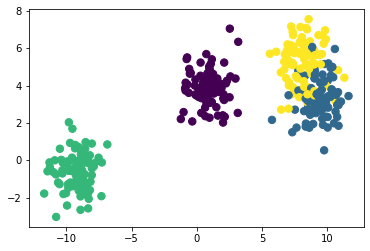

In [5]:
# 테스트용 데이터 생성 및 시각화
X, y = make_blobs(n_samples=350, centers=4, random_state=2111111715, cluster_std=1.0)

plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [6]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size = 0.3,random_state=2111111515)

In [28]:
# Baggingclassifier (분류기, 옵션) 
# n_estimators : 배깅시 사용할 분류기 수 지정
# max_samples : 배깅시 사용할 표본의 갯수
# bootstrap : 표본 추출시 중복 허용여부 지정
# n_jobs : 작업시 사용할 cpu 코어수 (-1 은 최대)
bgcf = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=300, max_samples=175, bootstrap=True, n_jobs=-1)

In [29]:
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.926530612244898 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


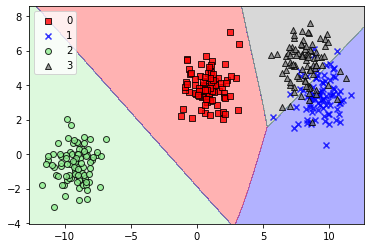

In [30]:
import mldlpy3
mldlpy3.plot_decision_regions(X,y, bgcf)

In [19]:
# 분류기 1개 수행시 결과
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
print(lr.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.926530612244898 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


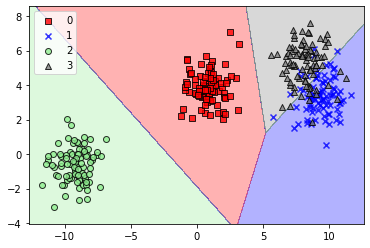

In [20]:
import mldlpy3
mldlpy3.plot_decision_regions(X,y,lr)

In [25]:
# KNeighbor 분류기 적용 
bgcf = BaggingClassifier(KNeighborsClassifier(), n_estimators=300, max_samples=175, bootstrap=True)

bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9469387755102041 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


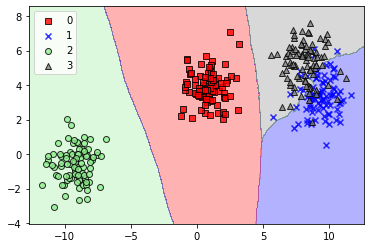

In [26]:
import mldlpy3

mldlpy3.plot_decision_regions(X,y,bgcf)